## *Generate clustering data*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

X_train, _ = make_blobs(n_samples=500, centers=3, n_features=2, random_state=20)

## *Visualize the data*

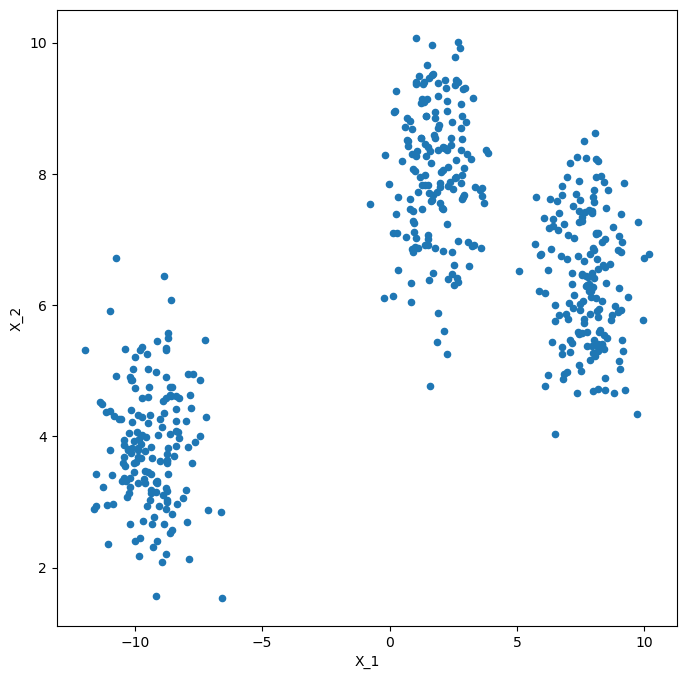

In [2]:
df = pd.DataFrame(dict(x=X_train[:,0], y=X_train[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

## *Helper functions for K-means*

In [44]:
class KMeans:
    
    def __init__(self, num_clusters):
        "K-means constructor: only need the sought-of number of clusters"
        
        self.num_clusters = num_clusters

    def init_centroids(self, X):
        "Random initialization of centroids"
        
        centroids = []
        num_features = X.shape[1]
        
        # Loop over clusters
        for i in range(self.num_clusters):
            
            # Get a random centroid within data range
            c = np.zeros(num_features)
            
            for j in range(num_features):
                c[j] = np.random.uniform(X[:,j].min(), X[:,j].max())
            
            centroids.append(c)
            
        return np.asarray(centroids)
    
    def assign_clusters(self, X, centroids):
        "Assign each data point to the closest  centroid"
        
        # Compute distances between all points and all centroids
        distances = np.linalg.norm(X[None,:,:] - centroids[:,None,:],axis=-1)
        
        # Return the minimum distances 
        return np.argmin(distances, axis=0)
    
    def compute_centroids(self, X, clusters):
        "Compute the new centroids"
        
        num_features = X.shape[1]
        centroids = np.zeros((self.num_clusters, num_features))
        
        # Compute the centroid over cluster i
        for i in range(self.num_clusters):
            print(X[clusters == i].shape)
            centroids[i] = np.mean(X[clusters == i],axis=0)
        
        return centroids
    
    def measure_change(self, centroids_prev, centroids_new):
        "Compute the change of each cluster's centroid"
        
        # Initialize distance
        distance = 0.
        
        # Add the change for each cluster's centroid
        for a,b in zip(centroids_prev,centroids_new):
            distance += np.linalg.norm(a-b)
        
        return distance
    
    def show_clusters(self, X, clusters, centroids):
        
        # Build data frane
        df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=clusters))
        
        colors = {0:'blue', 1:'orange', 2:'green'}
        fig, ax = plt.subplots(figsize=(8, 8))
        
        grouped = df.groupby('label')
        
        for key, group in grouped:
            group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
            
        ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=150, c='#ff2222')
        plt.xlabel('X_1')
        plt.ylabel('X_2')
        plt.show()
        
    def fit(self, X):
        
        # Initialize centroids
        centroids = self.init_centroids(X)
        
        # Initialize change
        centroids_diff = 100
        
        # Counter
        i = 0
        
        while centroids_diff > 1e-3:
            
            
            # Assign data points to actual clusters
            clusters = self.assign_clusters(X, centroids)
            
            # Show actual state
            self.show_clusters(X, clusters, centroids)
            
            # Compute new centroids
            new_centroids = self.compute_centroids(X, clusters)
            
            # Compute difference
            centroids_diff = self.measure_change(centroids, new_centroids)
            
            # Assign new centroids
            centroids = new_centroids
            
            print(f'Iteration {i}: Change = {centroids_diff}')
            i += 1
        
        return clusters


## *K-means*

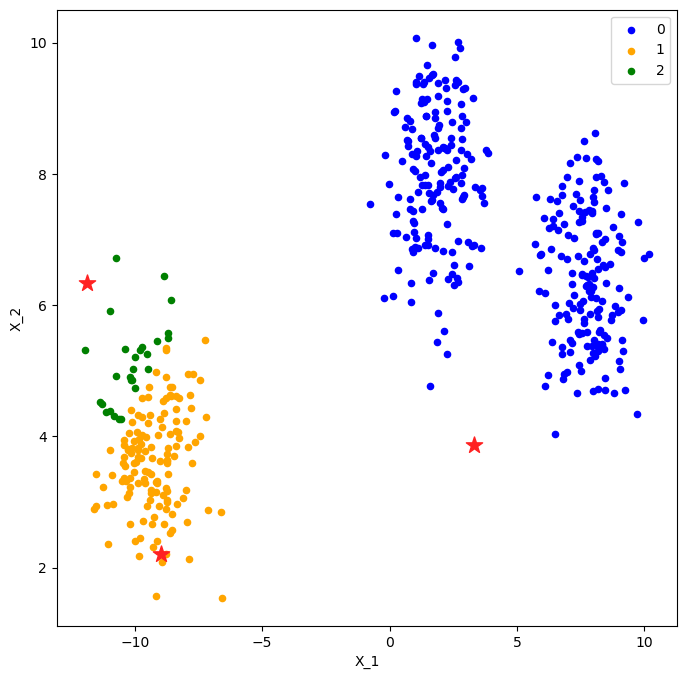

(334, 2)
(139, 2)
(27, 2)
Iteration 0: Change = 7.135019938712707


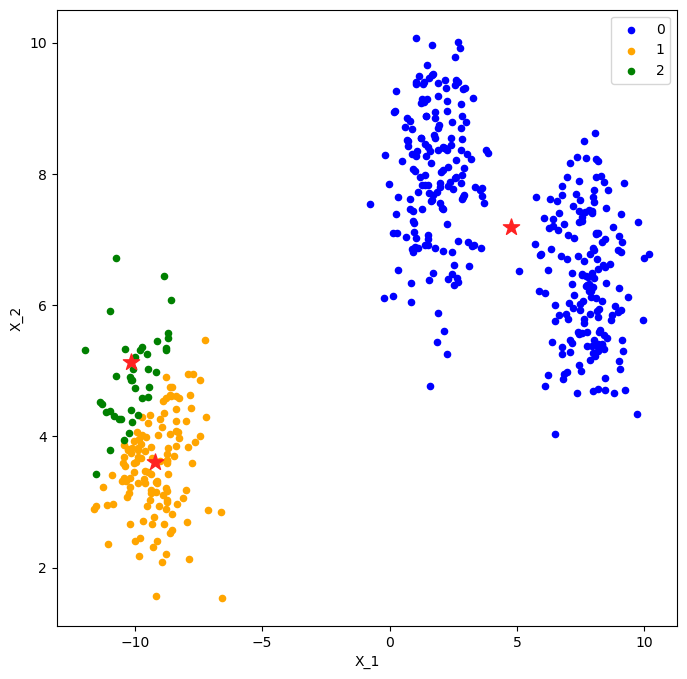

(334, 2)
(126, 2)
(40, 2)
Iteration 1: Change = 0.3496139302488682


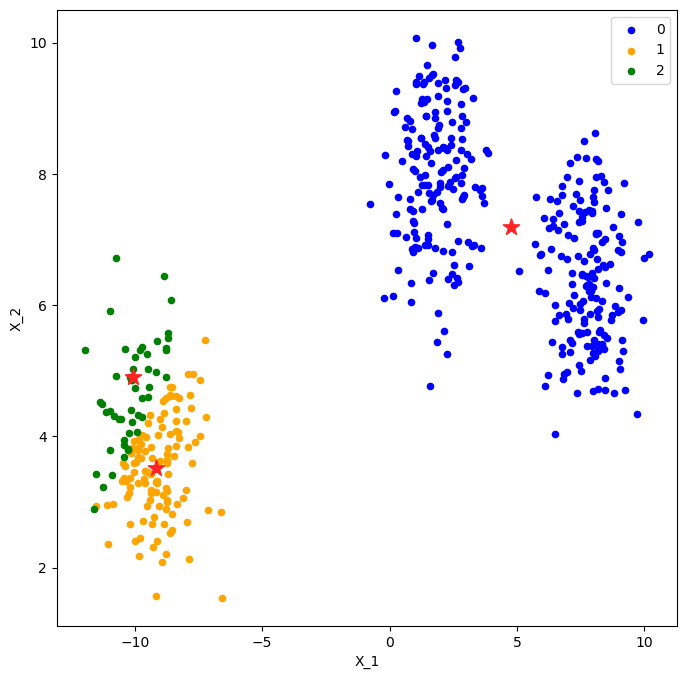

(334, 2)
(116, 2)
(50, 2)
Iteration 2: Change = 0.33464577218077385


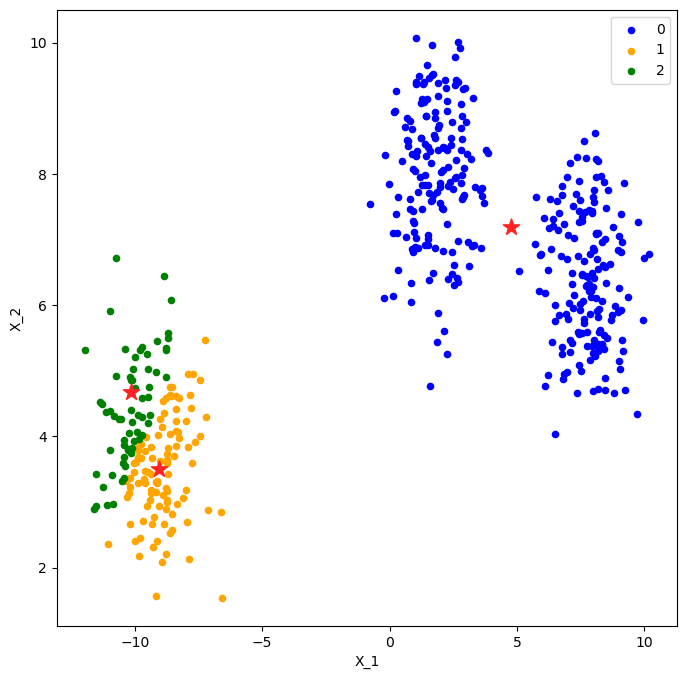

(334, 2)
(102, 2)
(64, 2)
Iteration 3: Change = 0.40394865089986315


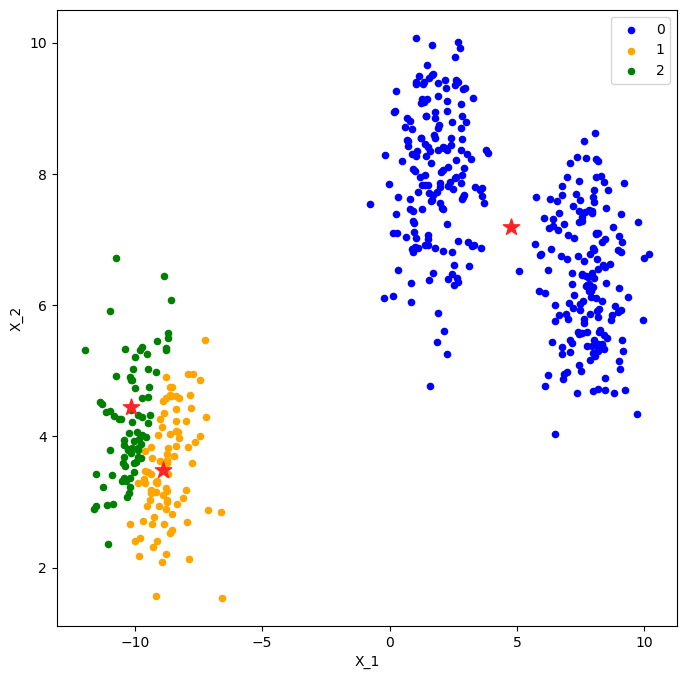

(334, 2)
(88, 2)
(78, 2)
Iteration 4: Change = 0.39899721250378417


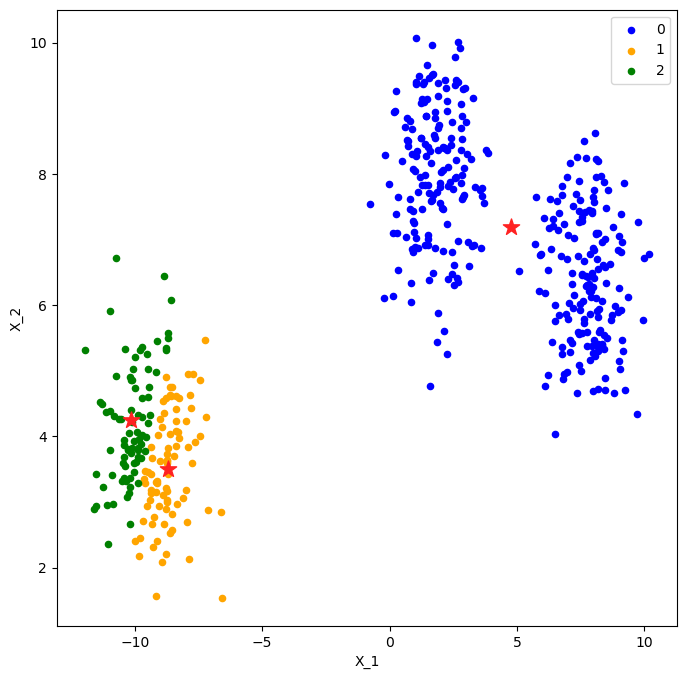

(334, 2)
(85, 2)
(81, 2)
Iteration 5: Change = 0.08218758349677036


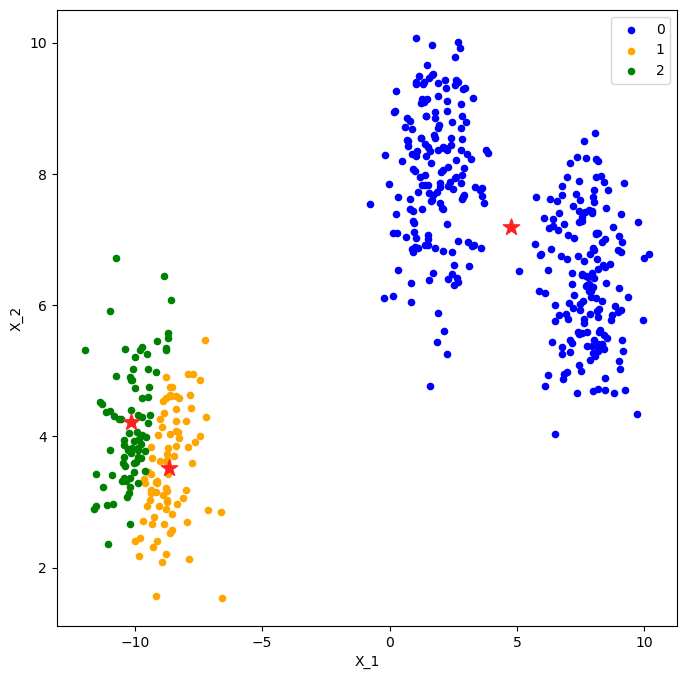

(334, 2)
(84, 2)
(82, 2)
Iteration 6: Change = 0.02276671057178819


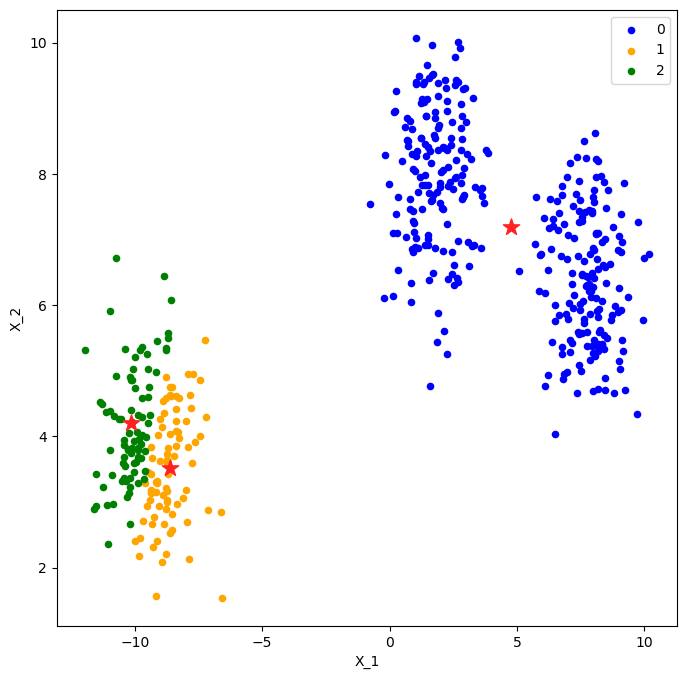

(334, 2)
(83, 2)
(83, 2)
Iteration 7: Change = 0.02426450687778615


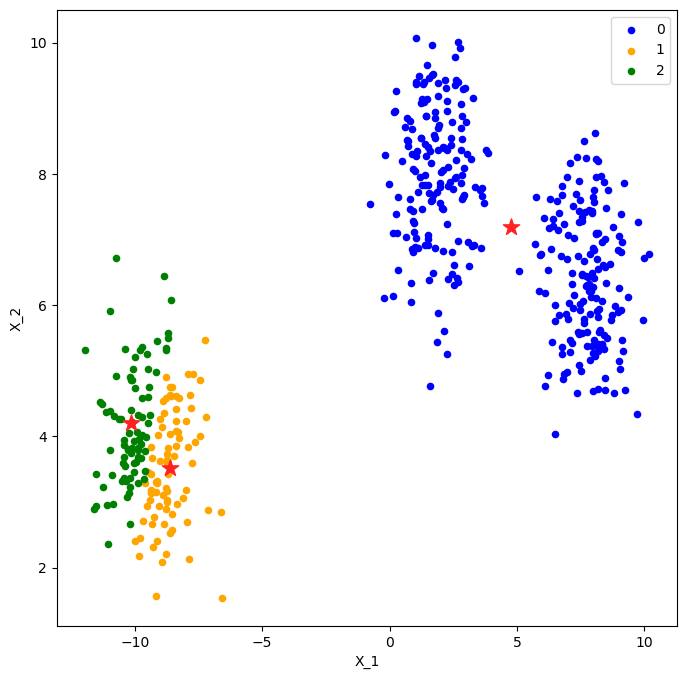

(334, 2)
(83, 2)
(83, 2)
Iteration 8: Change = 0.0


array([2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0,
       1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1,
       1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0,
       2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0,

In [45]:
kmeans = KMeans(3)
kmeans.fit(X_train)
